**Project Description**

You work in the Strimchik online store, which sells computer games all over the world. Historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation) are available from public sources. You need to identify the patterns that determine the success of the game. This will allow you to bid on a potentially popular product and plan advertising campaigns.
Here is the data up to 2016. Let's say it's December 2016 and you're planning a campaign for 2017. It is necessary to work out the principle of working with data. It doesn't matter if you're forecasting 2017 sales based on 2016 data or 2027 sales based on 2026 data.
The abbreviation ESRB (Entertainment Software Rating Board) comes across in the data set - this is an association that determines the age rating of computer games. The ESRB evaluates game content and assigns it to an appropriate age rating, such as Mature, Toddler, or Teen.

**Data Description**

* Name - the name of the game
* Platform - platform
* Year_of_Release - year of release
* Genre - game genre
* NA_sales - sales in North America (millions of copies sold)
* EU_sales - sales in Europe (millions of copies sold)
* JP_sales - sales in Japan (millions of copies sold)
* Other_sales - sales in other countries (millions of copies sold)
* Critic_Score - Critics score (max 100)
* User_Score - user score (maximum 10)
* Rating - rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

**Step 1. Open the data file and study the general information**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st
data = pd.read_csv('/datasets/games.csv')
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Step 2: Prepare the data**

In [3]:
# look at the number of passes
report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
Critic_Score,8578,0.51
Rating,6766,0.40
User_Score,6701,0.40
Year_of_Release,269,0.02
Name,2,0.00
Genre,2,0.00
Platform,0,0.00
NA_sales,0,0.00
EU_sales,0,0.00
JP_sales,0,0.00


* The gaps in the name and genre columns are insignificant, you can leave them alone
* The year_of_release column also has a non-critical number of gaps, it will be enough to analyze the data
* critic_score and user_score - most likely, most games with gaps in these columns do not have a rating due to the year of release, then there were no aggregator sites, it would be incorrect to fill in the median or average value, you can put the values \u200b\u200bto not confuse them with real values close to zero
* There are gaps in the rating column because there are countries where the rating system is different from the European one

In [4]:
# convert column names to lowercase
data.columns = data.columns.str.lower()
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
data['rating'] = data['rating'].str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# check for duplicates
data.duplicated().sum()
# lowercase the above to get rid of implicit duplicates

0

In [6]:
# the user_score column has the wrong data type
# check the unique values
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
# to change the data type to float you need to get rid of the 'tbd' data
# the value of tbd can be if the game is too old and it does not have enough ratings, or if the game is unpopular
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float')
# multiply the scores of the players by 10, needed to build a scatterplot
data['user_score'] = data['user_score']*10
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [8]:
#fill column rating, critic_score, user_score
data['rating'] = data['rating'].fillna('no rating')
data['user_score'] = data['user_score'].fillna(-1)
data['critic_score'] = data['critic_score'].fillna(-1)
data['rating'].unique()

array(['e', 'no rating', 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'],
      dtype=object)

In [9]:
# calculate the total sales in all regions and write them in a separate column
data['sales_total'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,80.0,e,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no rating,40.24
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,83.0,e,35.52
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,80.0,e,32.77
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no rating,31.38


**Step 3: Conduct an exploratory data analysis**

In [10]:
games_per_year = data.groupby('year_of_release')['name'].agg({'count'})
games_per_year

,count
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


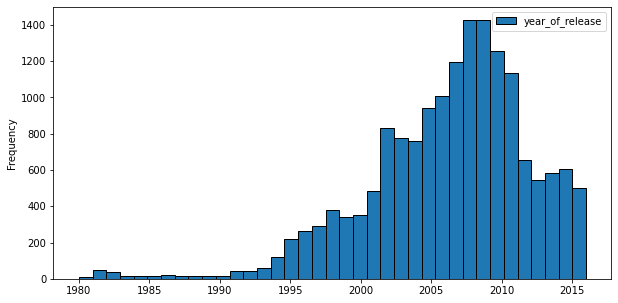

In [11]:
data.plot(y='year_of_release', kind='hist', bins=37, figsize=(10,5), ec='black')
plt.show()

* We can see that a sharp jump in the production of games occurred around 2002, and the best-selling period fell between 2007 and 2010. After 2011, there was a sharp decline. Most likely due to the emergence of successful games on new platforms not listed in the data, such as a mobile phone

In [12]:
platform_sales = data.groupby(['platform', 'year_of_release']).agg({'sales_total':'sum'}).reset_index()
platform_sales

,platform,year_of_release,sales_total
0,2600,1980.0,11.38
1,2600,1981.0,35.68
2,2600,1982.0,28.88
3,2600,1983.0,5.84
4,2600,1984.0,0.27
...,...,...,...
233,xb,2008.0,0.18
234,xone,2013.0,18.96
235,xone,2014.0,54.07
236,xone,2015.0,60.14


In [13]:
# find out which platforms have the highest total sales
data.pivot_table(index='platform', values='sales_total', aggfunc='sum').sort_values('sales_total', ascending=False)

,sales_total
platform,
ps2,1255.77
x360,971.42
ps3,939.65
wii,907.51
ds,806.12
ps,730.86
gba,317.85
ps4,314.14
psp,294.05


In [14]:
data_ds = data.query('platform == "ds"')
data_ds['year_of_release'].unique()

array([2006., 2005., 2010., 2009., 2004., 2007., 2012., 2008., 2011.,
         nan, 2013., 1985.])

There is an error in the data about the ds platform, but since further we will consider only actual years, you can not touch anything

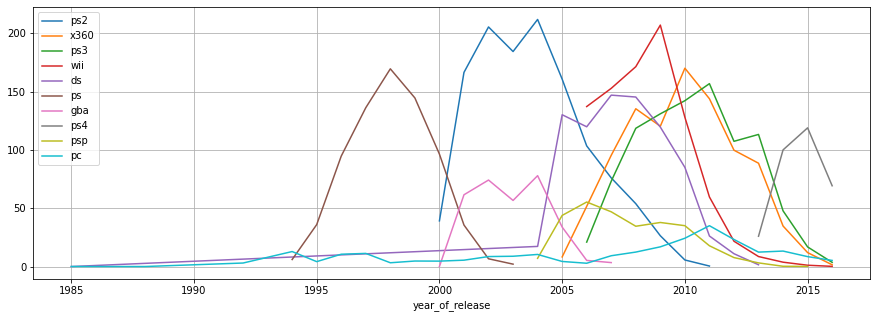

In [15]:
# see how sales have changed across popular platforms
popular_platforms = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'gba', 'ps4', 'psp', 'pc']

def total_sales(name, data):
    return (data
            .query("platform == @name")
            .pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
            .sort_values('year_of_release', ascending=False)
    )

for platform in list(popular_platforms):
    total_sales(platform, data)['sales_total'].plot(figsize=(15, 5), label=platform, grid=True)
    plt.legend()

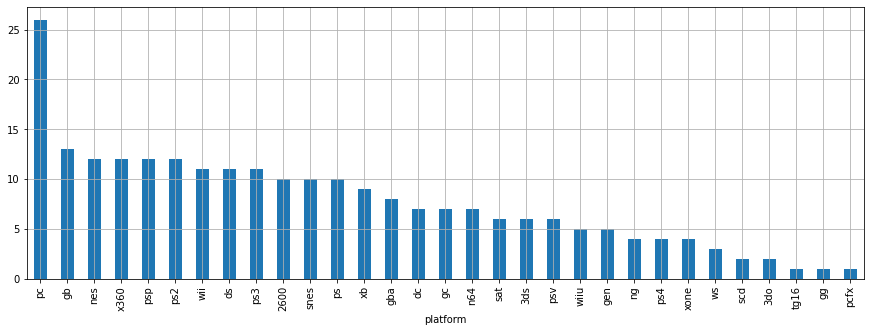

In [16]:
# check the lifetime of platforms
data.groupby('platform')['year_of_release'].agg("nunique").sort_values(ascending=False).plot(kind='bar', figsize=(15,5), grid=True)
plt.show()

Consider the lifetime of Playstation consoles:

* PS - lived for about 10 years, from 1994 to 2004
* PS2 - from 2000 to 2011, 11 years
* PS3 - from 2006 to 2015, in which it is almost irrelevant due to the release of PS4

We can say that the average lifespan of popular consoles is about 10 years.

* Below I will use data only for the current period

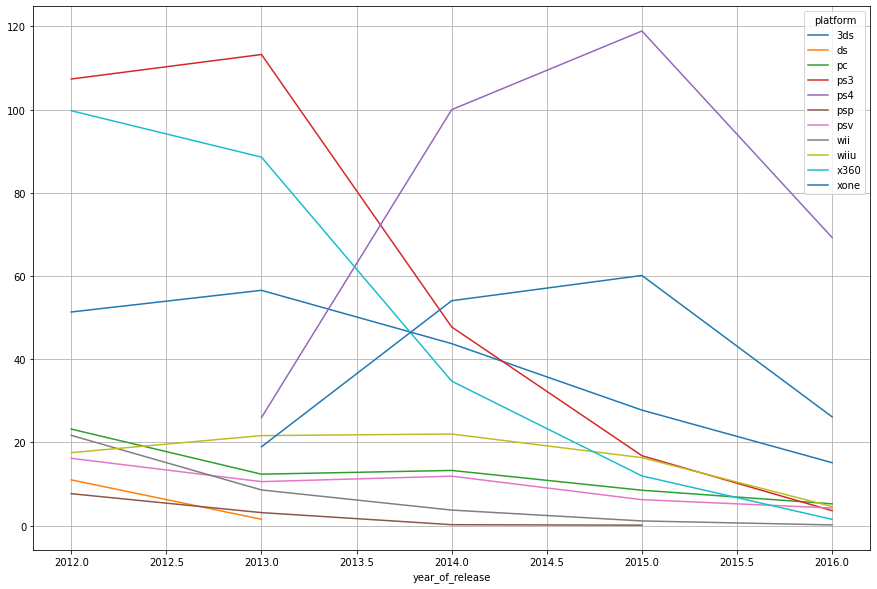

In [17]:
#  how charts behave with platforms for the current period
after_2012 = data[data['year_of_release'] >= 2012]
after_2012.pivot_table(index='year_of_release', columns='platform', values='sales_total', aggfunc='sum').plot(figsize=(15,10), grid=True)
plt.show()

In [18]:
topsales_after_2012 = after_2012.groupby(['platform']).agg({'sales_total':'sum'})
topsales_after_2012.sort_values(by='sales_total', ascending=False).head(10)

,sales_total
platform,
ps4,314.14
ps3,288.79
x360,236.54
3ds,194.61
xone,159.32
wiiu,82.19
pc,62.65
psv,49.18
wii,35.37


* Above is a list of top selling platforms in recent times.
* All platforms are starting to lose earnings due to the departure of a large part of the market to mobile devices

In [19]:
# build a "box with a mustache" graph of global game sales by platform
after_2012.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_total
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000
mean,2013.916840,0.204771,0.175613,0.066729,0.054109,32.303881,34.734581,0.501223
std,1.411766,0.566696,0.505346,0.241575,0.164639,37.473265,35.512190,1.249157
min,2012.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.010000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.040000
50%,2014.000000,0.030000,0.030000,0.010000,0.010000,-1.000000,35.000000,0.120000
75%,2015.000000,0.170000,0.140000,0.050000,0.040000,73.000000,71.000000,0.430000
max,2016.000000,9.660000,9.090000,4.390000,3.960000,97.000000,93.000000,21.050000


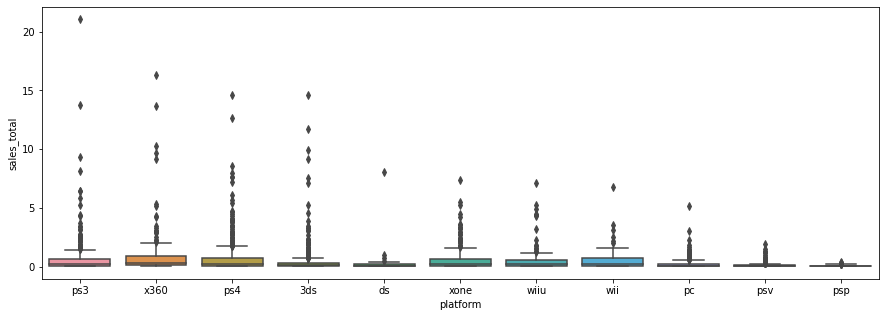

In [20]:
plt.figure(figsize=(15,5))
sb.boxplot(data=after_2012, x='platform', y='sales_total')
plt.show()

* Almost all the most profitable projects with high revenues are in the emission zone

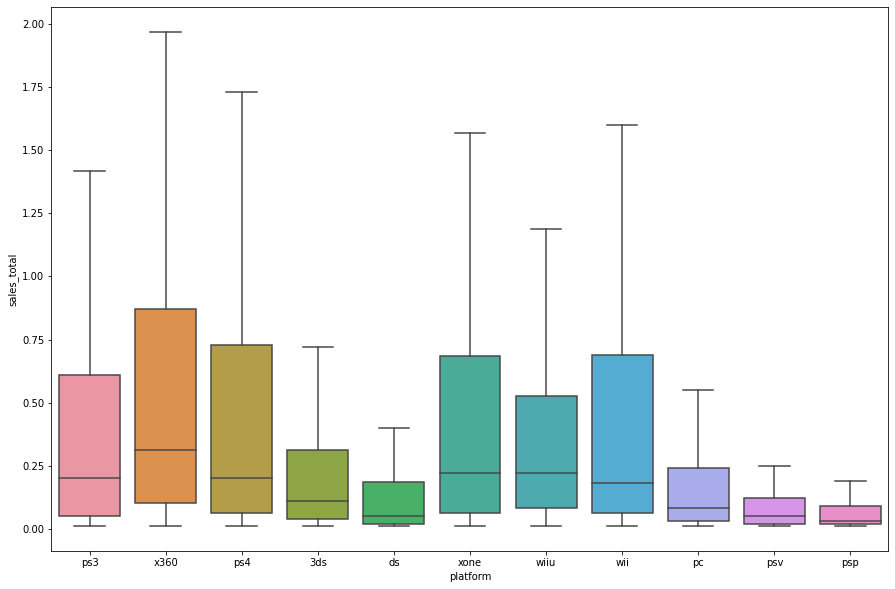

In [21]:
plt.figure(figsize=(15,10))
sb.boxplot(data=after_2012, x='platform', y='sales_total', showfliers = False)
plt.show()

* We can compare the recently released PS4 and Xbox One consoles, the sales distribution of ps4 is more skewed to the right, indicating that there are more really hit games on PS4, or they sell better

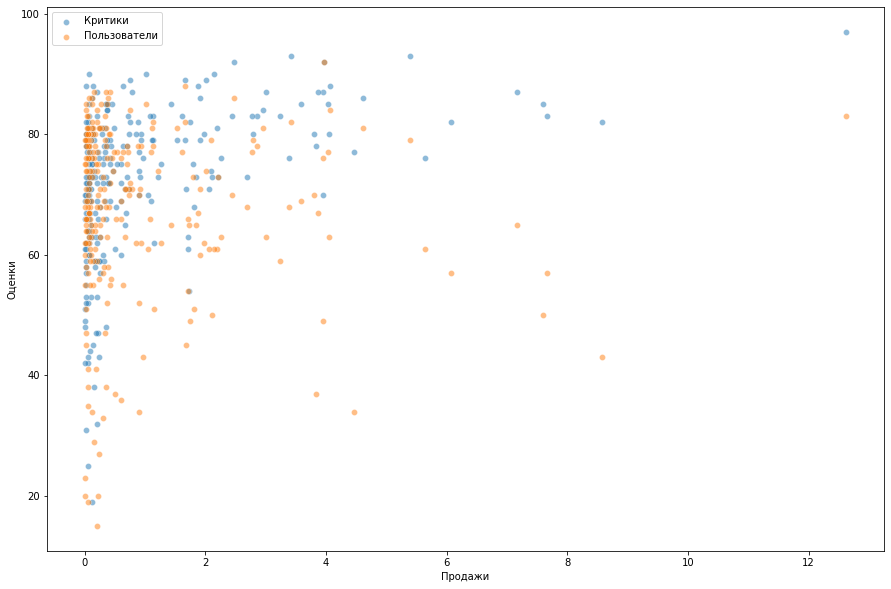

In [22]:
# how the reviews of users and critics affect sales within one popular platform
# build a scatterplot and calculate the correlation between reviews and sales
data_ps4 = after_2012.query('platform == "ps4" and critic_score>0 and user_score > 0')
plt.figure(figsize=(15,10))
sb.scatterplot(data=data_ps4, x='sales_total', y='critic_score', alpha=0.5)
sb.scatterplot(data=data_ps4, x='sales_total', y='user_score', alpha=0.5)
plt.xlabel('Продажи')
plt.ylabel('Оценки')
plt.legend(['Критики', 'Пользователи'])
plt.show()

In [23]:
# look at the correlation
data_ps4[['user_score', 'critic_score', 'sales_total']].corr()

,user_score,critic_score,sales_total
user_score,1.000000,0.557654,-0.033625
critic_score,0.557654,1.000000,0.405895
sales_total,-0.033625,0.405895,1.000000


In [24]:
# take only hit games
data_ps4.query('sales_total>1')[['user_score', 'critic_score', 'sales_total']].corr()

,user_score,critic_score,sales_total
user_score,1.000000,0.427860,-0.123617
critic_score,0.427860,1.000000,0.400709
sales_total,-0.123617,0.400709,1.000000


* We can observe the relationship between user and critic reviews
* User reviews do not affect sales, but the more hit the game, the greater the correlation
* Critical reviews and overall sales have a slightly less than average correlation

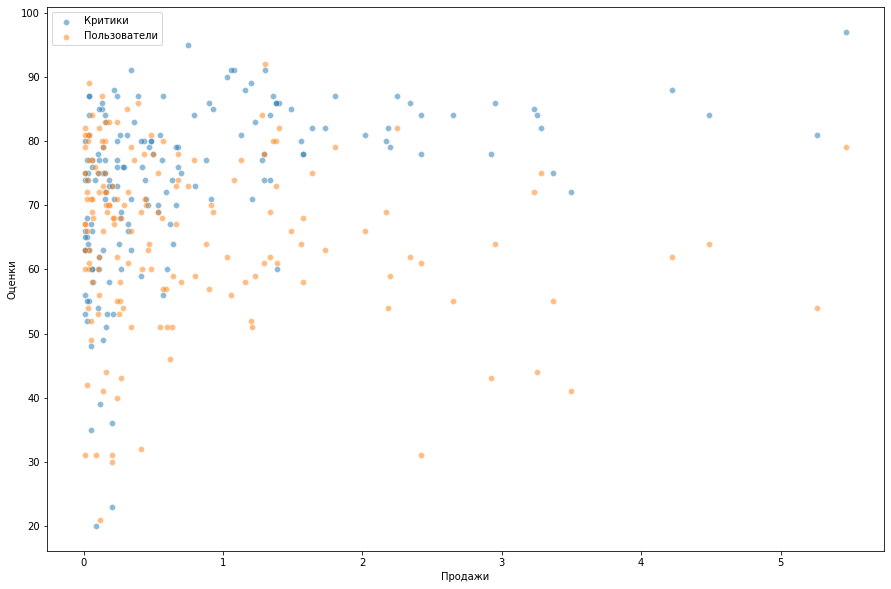

In [25]:
# correlate findings with game sales on other platforms
data_xone = after_2012.query('platform == "xone" and critic_score>0 and user_score > 0')
plt.figure(figsize=(15,10))
sb.scatterplot(data=data_xone, x='sales_total', y='critic_score', alpha=0.5)
sb.scatterplot(data=data_xone, x='sales_total', y='user_score', alpha=0.5)
plt.xlabel('Продажи')
plt.ylabel('Оценки')
plt.legend(['Критики', 'Пользователи'])
plt.show()

In [26]:
data_xone[['user_score', 'critic_score', 'sales_total']].corr()

,user_score,critic_score,sales_total
user_score,1.000000,0.472462,-0.094003
critic_score,0.472462,1.000000,0.410422
sales_total,-0.094003,0.410422,1.000000


In [27]:
data_xone.query('sales_total>1')[['user_score', 'critic_score', 'sales_total']].corr()

,user_score,critic_score,sales_total
user_score,1.000000,0.328292,-0.226187
critic_score,0.328292,1.000000,0.112908
sales_total,-0.226187,0.112908,1.000000


* Link between player and critic ratings is less than on ps4
* Still no correlation between player ratings and total sales
* It can be seen that critic scores and overall sales have almost the same correlation among all games on the platform, but hardly affect each other when it comes to hit games

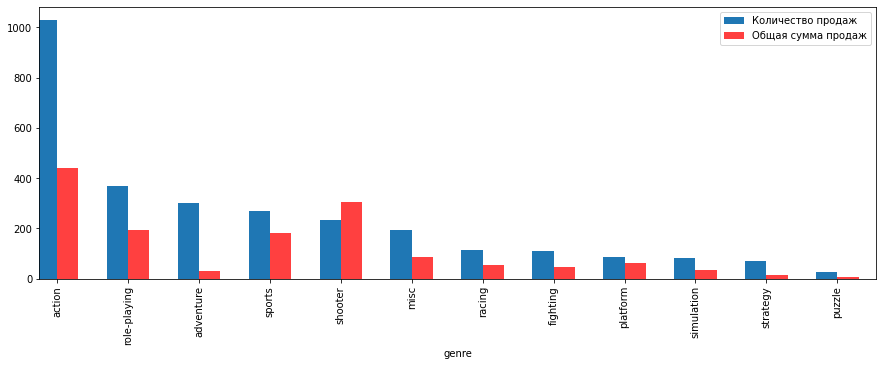

In [28]:
# Look at the overall distribution of games by genre.
# What can be said about the most profitable genres?
# Do genres with high and low sales stand out?
ax = plt.gca()
genre_plot = after_2012.groupby('genre').agg({'name': 'count', 'sales_total': 'sum'}).sort_values(by='name', ascending=False)

plot1 = genre_plot['name']
plot1.plot(kind='bar', figsize=(15,5), ax=ax, width=0.3, position=1)

plot2 = genre_plot['sales_total']
plot2.plot(kind='bar', figsize=(15,5), ax=ax, width=0.3, color='#FF4040', position=0)

ax.legend(['Количество продаж', 'Общая сумма продаж'])
plt.show()

* Most copies sold are in genres such as:

   1.Action

   2.Sports

   3.Misc


* Worst of all are Puzzle and Strategy

In [37]:
display(after_2012.groupby('genre')['sales_total'].describe().sort_values(by='50%', ascending=False))

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
shooter,235.0,1.296723,2.251662,0.01,0.135,0.440,1.4800,14.63
sports,268.0,0.675634,1.136378,0.01,0.080,0.240,0.7425,8.58
platform,85.0,0.717647,1.364413,0.01,0.090,0.210,0.6600,9.90
role-playing,370.0,0.521081,1.315937,0.01,0.060,0.140,0.4075,14.60
racing,115.0,0.465217,0.888664,0.01,0.050,0.140,0.4200,7.09
fighting,109.0,0.408165,0.910385,0.01,0.060,0.130,0.3600,7.55
action,1031.0,0.427856,1.166504,0.01,0.030,0.120,0.3900,21.05
misc,192.0,0.442917,1.081047,0.01,0.030,0.120,0.3375,9.18
simulation,80.0,0.439000,1.244500,0.01,0.030,0.120,0.3275,9.17


* The biggest incomes:
    
     1. Shooter
    
     2.Sports
    
     3.Platform
    

* Worst of all show themselves:
    
     Adventure
    
     Puzzle
    
     strategy

**Step 4. Create a user profile for each region**

In [29]:
after_2012.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16,grand theft auto v,ps3,2013.0,action,7.02,9.09,0.98,3.96,97.0,82.0,m,21.05
23,grand theft auto v,x360,2013.0,action,9.66,5.14,0.06,1.41,97.0,81.0,m,16.27
31,call of duty: black ops 3,ps4,2015.0,shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,no rating,14.63
33,pokemon x/pokemon y,3ds,2013.0,role-playing,5.28,4.19,4.35,0.78,-1.0,-1.0,no rating,14.60
34,call of duty: black ops ii,ps3,2012.0,shooter,4.99,5.73,0.65,2.42,83.0,53.0,m,13.79


In [30]:
#топ 5 самых популярных платформ по каждому из регионов
top_jp = after_2012.groupby('platform')[['jp_sales']].sum()
top_eu = after_2012.groupby('platform')[['eu_sales']].sum()
top_na = after_2012.groupby('platform')[['na_sales']].sum()

,na_sales
platform,
x360,140.05
ps4,108.74
ps3,103.38
xone,93.12
3ds,55.31


,eu_sales
platform,
ps4,141.09
ps3,106.86
x360,74.52
xone,51.59
3ds,42.64


,jp_sales
platform,
3ds,87.79
ps3,35.29
psv,21.04
ps4,15.96
wiiu,13.01


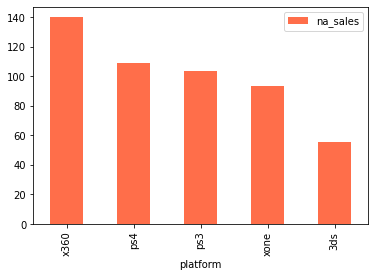

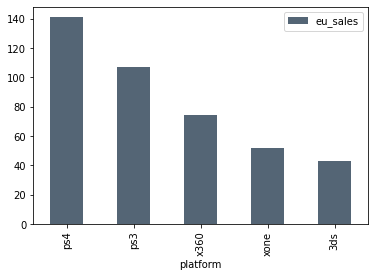

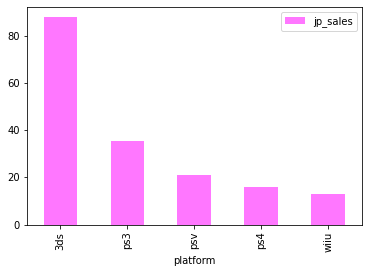

In [43]:
display(top_na.sort_values(by='na_sales', ascending=False).head())
display(top_eu.sort_values(by='eu_sales', ascending=False).head())
display(top_jp.sort_values(by='jp_sales', ascending=False).head())
after_2012.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', color='#ff6e4a')
after_2012.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', color='#546575')
after_2012.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', color='#ff77ff')
plt.show()

Biggest selling in North America market. It can be seen that in Europe and Japan ps is more popular than xbox, unlike North America. The Japanese market still seems to have a lot of love for handheld consoles, so it's worth paying attention to when making decisions in this region.

In [32]:
# look at the popular genres for each region
top_jp_genre = after_2012.groupby('genre')[['jp_sales']].sum()
top_na_genre = after_2012.groupby('genre')[['na_sales']].sum()
top_eu_genre = after_2012.groupby('genre')[['eu_sales']].sum()

,na_sales
genre,
action,177.84
shooter,144.77
sports,81.53
role-playing,64.00
misc,38.19


,eu_sales
genre,
action,159.34
shooter,113.47
sports,69.09
role-playing,48.53
racing,27.29


,jp_sales
genre,
role-playing,65.44
action,52.80
misc,12.86
simulation,10.41
fighting,9.44


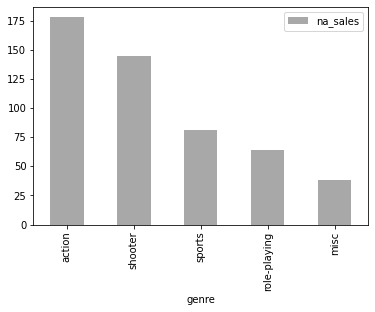

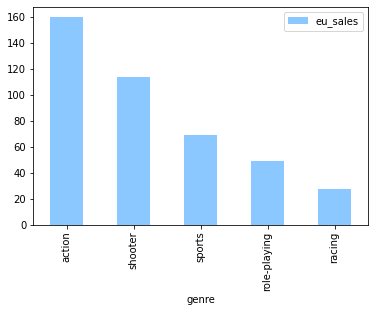

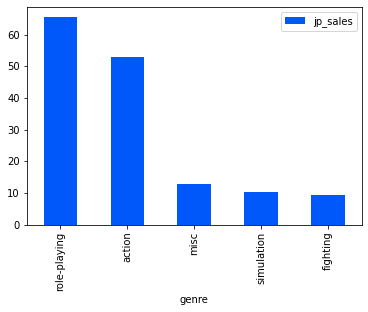

In [41]:
display(top_na_genre.sort_values(by='na_sales', ascending=False).head())
display(top_eu_genre.sort_values(by='eu_sales', ascending=False).head())
display(top_jp_genre.sort_values(by='jp_sales', ascending=False).head())
after_2012.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', color='#a8a8a8')
after_2012.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', color='#8ac8ff')
after_2012.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', color='#0057fa')
plt.show()

The Action genre is quite popular in each of the regions. Of the differences, one can single out that the RP / RPG genre is very popular in the Japanese market. In Japan, such games as pokemon, final fantasy, zelda and persona are very popular.

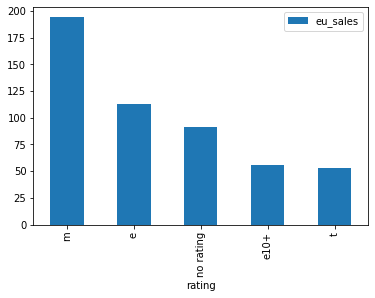

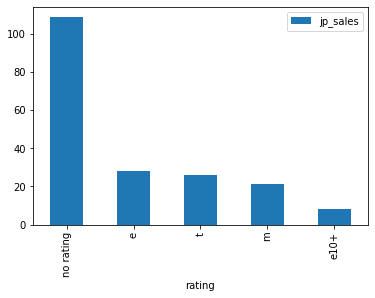

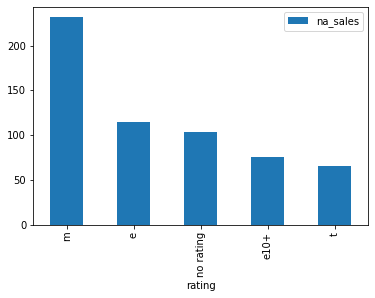

In [34]:
# Impact of ESRB rating on sales in each region
after_2012.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
after_2012.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
after_2012.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.show()

Most of the earnings in the European and North American region come from M and E rated games. Interestingly, the Japanese region is dominated by games without any rating, followed by E and T rated games.

**Step 5. Test the hypotheses**

**Checking hypothesis 1**

It turns out the hypothesis about the equality of the means of the two general populations.

The null hypothesis is that the average user ratings of the Xbox One and PC platforms are the same.

An alternative hypothesis is that the average user ratings of the Xbox One and PC platforms are different.

In [35]:
xone_score = after_2012.query('platform == "xone" and user_score > 0')['user_score']
pc_score = after_2012.query('platform == "pc" and user_score > 0')['user_score']

alpha = .05


results = st.ttest_ind(
    xone_score,
    pc_score,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965135056
Не получилось отвергнуть нулевую гипотезу


The hypothesis that the average user ratings of the Xbox One and PC platforms are the same is not rejected.

**Checking hypothesis 2**

It turns out the hypothesis about the equality of the means of the two general populations.

The null hypothesis is that the average user ratings of the Action and Sports genres are the same.

An alternative hypothesis is that the average user ratings of the Action and Sports genres are different.

In [36]:
action_score = after_2012.query('genre == "action" and user_score > 0')['user_score']
sports_score = after_2012.query('genre == "sports" and user_score > 0')['user_score']

alpha = .05

results = st.ttest_ind(
    action_score,
    sports_score,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.243077765726105e-20
Отвергаем нулевую гипотезу


The average user ratings of the Action and Sports genres are different - the hypothesis is confirmed.

In [ ]:
Нулевая гипотеза - cредние пользовательские рейтинги жанров Action и Sports одинаковые - отвергается.

**General conclusion**

An analysis was made of video game sales over time, as well as depending on the platform, region and genres.
At the stage of preprocessing, we reduced all text data to lower case, to simplify further work, corrected incorrect data types, filled in the gaps where necessary, created the necessary columns.
* The market for the platforms presented in the data has been in a general loss in the last 5-6 years, as competitors have appeared in the form of mobile games
* The greatest sales for the entire existence of gaming platforms were provided by the PS2 prefix
* The greatest influence on the final revenue is, in most cases, the ratings of critics. Player ratings have less influence
* The approximate life cycle of gaming platforms is 10 years, and on this basis we can expect that in 2017 the positions of PS4 and Xbox One consoles will be the strongest
 
  **Recommendations:**
* Particular attention should be paid to games of genres: Shooter, Action, Sports, Roleplaying
* If possible, expand into the mobile market